# numerically solving differential equations

let's use `DifferentialEquations.jl` (documentation [here](https://docs.juliadiffeq.org/stable/index.html)) to compute the numerical solution to differential equations.

In [1]:
using DifferentialEquations, PyPlot

# (optional) change to a cool plot style. 
# see here for options: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("Solarize_Light2")

## drug decay

a drug decays in your body with first order reaction kinetics. 

let $a=a(t)$ be the concentration of drug [units: mol/L] in your body at time $t$ [units: hr]. the following is a dynamic model for the decay of the drug:

$\dfrac{da}{dt}= -r a$

where $r$ [units: 1/hr] is the decay rate.

after the intial dose, the concentration of the drug is $a(t=0)=a_0$. 
simulate the decay of the drug in your body over 24 hours if no further doses are administered.

*step 1*: define the parameters in the model (`r`) and the initial condition `a₀`. type `a\_0` then hit `Tab` to get the `a₀`.

In [2]:
r = 0.2 # decay rate, 1/hr
a₀ = 0.05 # initial concentration, mol/L

0.05

*step 2*: define the right hand side of the ODE

`DifferentialEquations.jl` enforces you to write the right-hand side as:

$\dfrac{da}{dt}= f(a, p, t)$

where $p$ is a vector of parameters (which we will not use).

here, $f(a, p, t)=-ra$

In [3]:
f(a, p, t) = - r * a # right hand side of ODE

f (generic function with 1 method)

*step 3*: use `DifferentialEquations.jl` to solve the ODE numerically.

* `time_span` is the time span over which we wish to compute the solution
* `ODEProblem()` is how we tell `DifferentialEquations.jl` about our ODE
* `solve()` tells `DifferentialEquations.jl` to numerically solve our ODE

In [4]:
time_span = (0.0, 24.0) # solve from t = 0 to t = 24 hrs
prob = ODEProblem(f, a₀, time_span)
a_of_t = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 13-element Array{Float64,1}:
  0.0               
  0.1385204951267627
  0.967186411127158 
  2.3746288536788995
  4.0157691781970035
  6.04573862097466  
  8.343230665477723 
 10.943395549857078 
 13.784247831462256 
 16.866062272063417 
 20.16841414936944  
 23.70934239032856  
 24.0               
u: 13-element Array{Float64,1}:
 0.05                  
 0.04863380700204163   
 0.04120607615823622   
 0.031096563063739466  
 0.022395709930665086  
 0.014922592463793818  
 0.009425133130309626  
 0.005603276660896331  
 0.003174626245547482  
 0.0017140224931608049 
 0.0008855015830573804 
 0.0004361615612349008 
 0.00041152970559181116

the output of `solve`, `a_of_t`, is a function, where we can find the solution at e.g., $t=0.1$ as `a_of_t(0.1)`

In [5]:
a_of_t(0.1)

0.049009933665349815

*step 4:* plot the solution

we make a regular grid of times $t_i$ in the interval $[0, 24]$ and store them in an array `t`. we then make an array `a` whose element $i$ is $a(t_i)$.

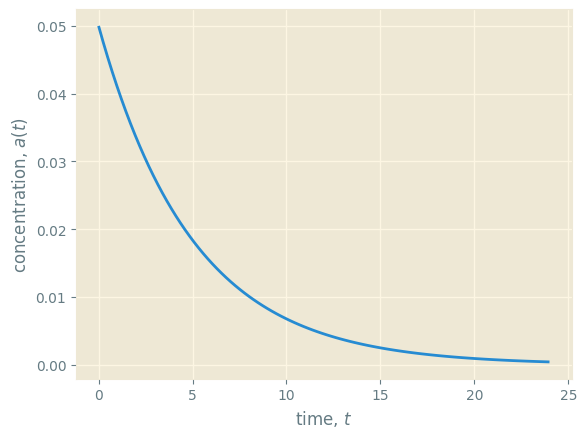

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f31d19f4ef0>

In [12]:
t = range(0.0, 24.0, length=100) # range of times, t_i's
a = a_of_t.(t) # corresponding concentrations, a(t_i)'s'

figure()
xlabel(L"time, $t$") # the L in front of the String allows LaTeX to parse it.
ylabel(L"concentration, $a(t)$")
plot(t, a)

**ambitious Beavers only who enjoy programming challenges:** given the solution to the ODE, say the drug is ineffective after its concentration is below 0.01 mol/L. at what time, then, does the drug become ineffective? (write a code to determine the answer to this, rather than eye-balling the plot).

In [13]:
a .< 0.01 # true when concentration less than 0.01

100-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [15]:
id = findfirst(a .< 0.01) # find index of first element less than 0.01

35

In [25]:
t_ineffective = t[id] # get that element in the time array

8.242424242424242

check we found it

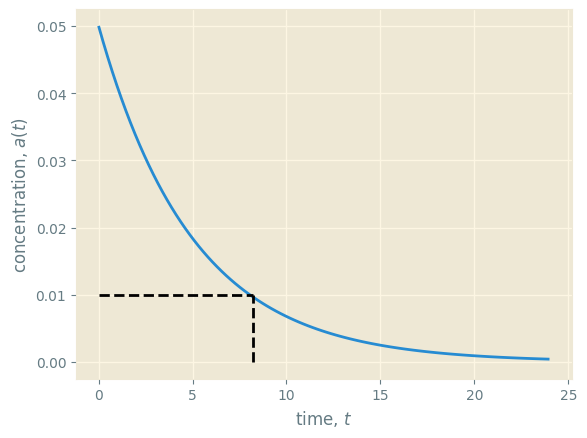

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f31cd18ceb8>

In [26]:
figure()
xlabel(L"time, $t$") # the L in front of the String allows LaTeX to parse it.
ylabel(L"concentration, $a(t)$")
plot(t, a)
plot([0.0, t_ineffective], [0.01, 0.01], linestyle="--", color="k")
plot([t_ineffective, t_ineffective], [0.0, 0.01], linestyle="--", color="k")